In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
# import open3d as o3d
import sys
from models.wrap import inverse_warp
from models.GAN import DPGAN
from models.cor_loss import CORLoss,PhotometricLoss
import torchvision

torch.Size([1, 3, 352, 1216])


/Users/dingkeyi/opt/anaconda3/envs/open3d/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/Users/dingkeyi/opt/anaconda3/envs/open3d/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([1, 352, 1216])


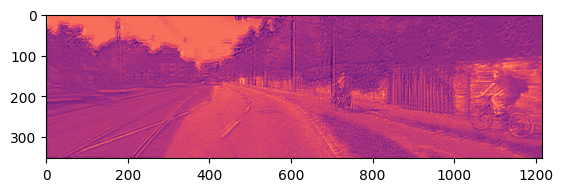

In [2]:
img = Image.open("images/1.png")
transform = transforms.Compose([
    transforms.Resize((352,1216)),
    transforms.ToTensor(),
])
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="magma");

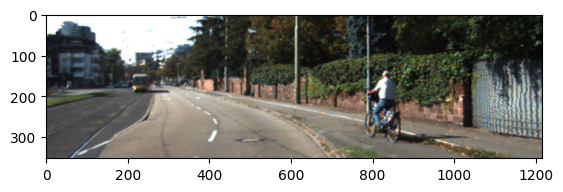

In [3]:
# depth = torch.rand(1,352,1216)/100000000000


# im_frame = Image.open('true_depth.png').convert('L')
# np_frame = (np.array(im_frame).astype(np.double))
# depth = torch.from_numpy(np_frame)
# depth = depth[None,:,:].float()
# print(depth)

pose_left = torch.tensor([[ 0, 0, 100, 0, 0, 0]])
intrinsics = torch.tensor([[721.5377, 0, 596.5593],
                                           [0, 721.5377, 149.854],
                                           [0, 0, 1]])
rep,val,grid = inverse_warp(img, depth, pose_left,intrinsics,rotation_mode='euler', padding_mode='zeros')
rep_0= torch.squeeze(rep[0], dim=0)
plt.imshow(np.transpose(rep_0.detach().numpy(), (1,2,0)));

In [4]:
cor_loss = PhotometricLoss()
cor_loss(img,rep)

/Users/dingkeyi/Desktop/JHU/Spring2023/Deep_Learning/dl_final_project/models/cor_loss.py:68: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  diff = diff[valid_mask]


tensor(0.5326, grad_fn=<MeanBackward0>)

tensor(126.7280, grad_fn=<MeanBackward0>) tensor(1.1287, grad_fn=<StdBackward0>)


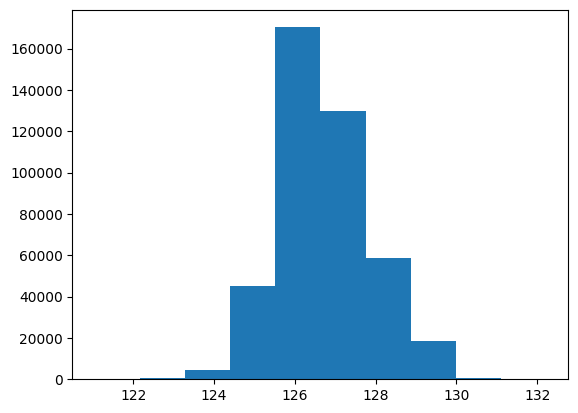

In [5]:
print(depth.mean(), depth.std())
plt.hist(np.ravel(depth.detach().numpy()));

In [6]:
dpgan = DPGAN()
# dpgan.to('cuda')
# dpgan.train(None,5,10)

In [7]:
dpgan.train_model(None,1,30)

Training epoch 0 of 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 5.1327e-04,  6.0992e-04,  5.3645e-04, -2.5149e-04, -5.1720e-05,
         -2.9427e-06]], grad_fn=<MulBackward0>)
tensor([[ 5.1327e-04,  6.0992e-04,  5.3645e-04, -2.5149e-04, -5.1720e-05,
         -2.9427e-06]], grad_fn=<MulBackward0>)


/Users/dingkeyi/opt/anaconda3/envs/open3d/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/IndexingUtils.h:28.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


tensor(125.3293, grad_fn=<MeanBackward0>) tensor(1.2246, grad_fn=<StdBackward0>)
Generator loss: 0.6705936193466187, Discriminator loss: 1.5195512771606445
---------------------------------------------------------
Training epoch 1 of 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 4.9706e-04,  6.0038e-04,  5.4315e-04, -3.0152e-04, -1.2559e-04,
          7.4700e-06]], grad_fn=<MulBackward0>)
tensor([[ 4.9706e-04,  6.0038e-04,  5.4315e-04, -3.0152e-04, -1.2559e-04,
          7.4700e-06]], grad_fn=<MulBackward0>)
tensor(123.5859, grad_fn=<MeanBackward0>) tensor(1.1909, grad_fn=<StdBackward0>)
Generator loss: 0.6680762767791748, Discriminator loss: 0.00019530946156010032
---------------------------------------------------------
Training epoch 2 of 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 4.8294e-04,  5.9575e-04,  5.5095e-04, -3.4861e-04, -1.9768e-04,
          1.4597e-05]], grad_fn=<MulBackward0>)
tensor([[ 4.8294e-04,  5.9575e-04,  5.5095e-04, -3.4861e-04, -1.9768e-04,
          1.4597e-05]], grad_fn=<MulBackward0>)
tensor(121.8279, grad_fn=<MeanBackward0>) tensor(1.1672, grad_fn=<StdBackward0>)
Generator loss: 0.6660377979278564, Discriminator loss: 0.0001814299903344363
---------------------------------------------------------
Training epoch 3 of 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 4.6633e-04,  5.9465e-04,  5.5557e-04, -4.0016e-04, -2.6891e-04,
          2.3145e-05]], grad_fn=<MulBackward0>)
tensor([[ 4.6633e-04,  5.9465e-04,  5.5557e-04, -4.0016e-04, -2.6891e-04,
          2.3145e-05]], grad_fn=<MulBackward0>)
tensor(120.0263, grad_fn=<MeanBackward0>) tensor(1.1550, grad_fn=<StdBackward0>)
Generator loss: 0.6643109321594238, Discriminator loss: 0.0005746994283981621
---------------------------------------------------------
Training epoch 4 of 100


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 4.4372e-04,  5.9353e-04,  5.5901e-04, -4.5666e-04, -3.4390e-04,
          2.8170e-05]], grad_fn=<MulBackward0>)
tensor([[ 4.4372e-04,  5.9353e-04,  5.5901e-04, -4.5666e-04, -3.4390e-04,
          2.8170e-05]], grad_fn=<MulBackward0>)
tensor(118.1684, grad_fn=<MeanBackward0>) tensor(1.1554, grad_fn=<StdBackward0>)
Generator loss: 0.6628609895706177, Discriminator loss: 0.0022970745339989662
---------------------------------------------------------
Training epoch 5 of 100
tensor([[ 4.1619e-04,  5.9454e-04,  5.6072e-04, -5.2366e-04, -4.2617e-04,
          2.9780e-05]], grad_fn=<MulBackward0>)
tensor([[ 4.1619e-04,  5.9454e-04,  5.6072e-04, -5.2366e-04, -4.2617e-04,
          2.9780e-05]], grad_fn=<MulBackward0>)
tensor(116.2335, grad_fn=<MeanBackward0>) tensor(1.1695, grad_fn=<StdBackward0>)
Generator loss: 0.661679208278656, Discriminator loss: 0.0052071260288357735
---------------------------------------------------------
Training epoch 6 of 100
tensor([[ 3.8291e-04,  5.9723e-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[ 3.4314e-04,  6.0044e-04,  5.5241e-04, -7.1607e-04, -6.0855e-04,
          1.8509e-05]], grad_fn=<MulBackward0>)
tensor([[ 3.4314e-04,  6.0044e-04,  5.5241e-04, -7.1607e-04, -6.0855e-04,
          1.8509e-05]], grad_fn=<MulBackward0>)
tensor(112.1739, grad_fn=<MeanBackward0>) tensor(1.2496, grad_fn=<StdBackward0>)
Generator loss: 0.6606776714324951, Discriminator loss: 0.0016382604371756315
---------------------------------------------------------
Training epoch 8 of 100
tensor([[ 3.0628e-04,  6.0050e-04,  5.4974e-04, -8.3486e-04, -6.7342e-04,
         -5.0517e-06]], grad_fn=<MulBackward0>)
tensor([[ 3.0628e-04,  6.0050e-04,  5.4974e-04, -8.3486e-04, -6.7342e-04,
         -5.0517e-06]], grad_fn=<MulBackward0>)
tensor(110.2745, grad_fn=<MeanBackward0>) tensor(1.3229, grad_fn=<StdBackward0>)
Generator loss: 0.6611230373382568, Discriminator loss: 0.0005330224521458149
---------------------------------------------------------
Training epoch 9 of 100
tensor([[ 2.9160e-04,  5.9639e

: 

: 